In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Ház ár legenerálása
#Egy mérethez egy árat számítunk


#size: square meter math.sqrt(i+j/10)*7+ 0.2*i)*1000000
#distance from the center 1000/distance +10   dinstance 100-5000 meter
#interest rate 1-10% = -(x**2)/7 +30
#government support yes = 0-10 million
#local average salaray(HUF) 2-8


X_training = []
y_training = []
#header = ["size"]
header = ["size","distance from center","support","salary"]

for i in range(10000):
    
    price = 0
    
    size = random.randint(20,99)+random.randint(0,10)/10
    distance = random.randint(30,100)
    #interest_rate = random.randint(1,10)
    support = random.randint(0,10)
    salary = random.randint(3,8)

    price += ((math.sqrt(size)*10+0.3*(size/10)))

    price += (1000/distance + 5)
    #price += (-(interest_rate**2)/4 +30)
    price += support
    price += salary**3
    

    X_training.append([size,distance,support,salary])
    y_training.append(price)
    
X_train = []
y_train = []

X_test = []
y_test = []

#Felosztjuk az adatokat 
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2) # 80% training and 20% testing data
print(X_train[0])
print(y_train[0])

[37.6, 93, 2, 7]
423.1995270390666


In [3]:
#Sorba rendezzük az adathalmazt a méret alapján növekvően

for i in range(len(X_train)):
    temp = i
    for j in range(i,len(X_train)):
        if(X_train[j]<X_train[temp]):
            temp = j
    if(temp != i):
        tmp = X_train[i]
        X_train[i] = X_train[temp]
        X_train[temp] = tmp
        
        tmp = y_train[i]
        y_train[i] = y_train[temp]
        y_train[temp] = tmp

for i in range(len(X_test)):
    temp = i
    for j in range(i,len(X_test)):
        if(X_test[j]<X_test[temp]):
            temp = j
    if(temp != i):
        tmp = X_test[i]
        X_test[i] = X_test[temp]
        X_test[temp] = tmp
        
        tmp = y_test[i]
        y_test[i] = y_test[temp]
        y_test[temp] = tmp



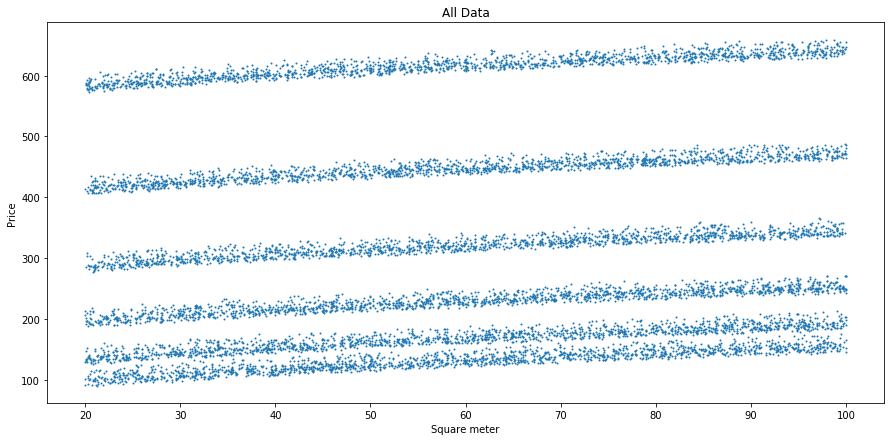

In [4]:
# visualize data set
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_training[i][0] for i in range(len(X_training)) ],y_training,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("All Data")

plt.show()

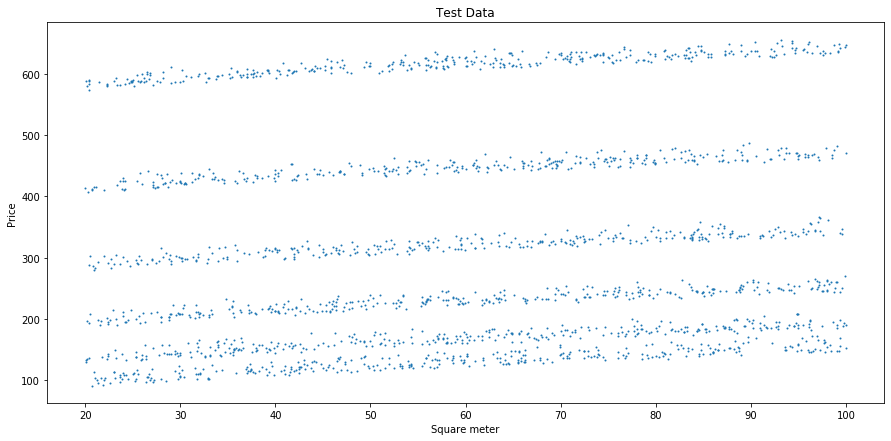

In [5]:
# visualize data set
plt.rcParams["figure.figsize"] = (15,7)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=1)

plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test Data")

plt.show()

In [6]:
class Tree:
    def __init__(self,X,feature_names,labels):
        
        self.X = X
        self.num_of_nodes = 0
        self.currentsplit = 0
        self.split_result = 0
        self.feature_names = feature_names #coloum names
        self.labels = labels#y
        self.catagories = set(labels)
        self.nodes = []
        self.leaf = 0
        

In [7]:
class Node:
    def __init__(self,labels,X,feature_ids):
        
        self.split_result = 0
        self.split = 0 #which column / which feature id
        self.feature_ids = feature_ids
        self.labels = labels
        self.X = X
        self.nodes = []
        self.regr = 0
        self.depth = 0
        
        self.leaf = 0 #true or false

In [8]:
def get_features(X,labels,column,split_value):#return splited data
    
    #on which dimension it should split the data -> column

    #Itt az adatokat mindig kettő felé osztjuk
    
    features = [ X[i][column] for i in range(len(X)) ]#take a column
  
    sub_labels = [] 
    sub_label = [labels[x] for x in range(len(features)) if features[x]<split_value]
    sub_X = [X[x] for x in range(len(features)) if features[x]<split_value]
    sub_labels.append([sub_label,sub_X,column])
    
    sub_label = [labels[x] for x in range(len(features)) if features[x]>=split_value]
    sub_X = [X[x] for x in range(len(features)) if features[x]>=split_value]#teljes adathalmazt viszi tovább!?

    
    sub_labels.append([sub_label,sub_X,column])
        
    return sub_labels

In [9]:
def calculate_mse(data):
   
    mean = sum(data)/len(data)
    
    variance = 0
    
    for i in data:
        variance += (i-mean)**2
    
    
    return variance/len(data)
    

In [26]:
def regression(regr_type,X,y,column):#whaT TYPE OF REGRESSION,data
    
    
    #use one column only!!!! features = [ [X[i][column]] for i in range(len(X)) ]#take a column
    #reshape data
    X = [ [X[i][column]] for i in range(len(X)) ]
    
    X = PolynomialFeatures(degree=4).fit_transform(X)
    
    regr = LinearRegression()
    regr.fit(X,y)
    
    
    return regr

In [27]:
def calculate_error(regr,X,y,column):
    
    #use one column only!!!! features = [ [X[i][column]] for i in range(len(X)) ]#take a column
    #reshape data
    X = [ [X[i][column]] for i in range(len(X)) ]
    X = PolynomialFeatures(degree=4).fit_transform(X)
    predict = regr.predict(X)
    #print(X)
    difference = []
    
    for i in range(len(predict)):
        difference.append( (predict[i]-y[i])**2 )
    error = sum(difference)/len(difference)

  
    return error

In [28]:
def calculate_split_regression(X,labels,column,split_value):
    
    error = 0
    
    sub_labels = get_features(X,labels,column,split_value) 
    
    for i in sub_labels:

        if(len(i[0]) == 0):
            return -1
        regr = regression(1,i[1],i[0],column)
        error+= calculate_error(regr,i[1],i[0],column)

  
    return error

In [29]:
def find_best_split(X,labels,feature_ids):
    
    lowest_error = -1
    split = 0
    split_value = 0
    V = 0 
    
    features = 0 
    svalue = 0

    for i in feature_ids:
        
            features = [ X[j][i] for j in range(len(X)) ] 

            for k in range(0,len(features)-1,2): 

                if(features[k]==features[k+1]):
                    continue
                
                svalue = (features[k]+features[k+1])/2
                V = calculate_split_regression(X,labels,i,svalue)
                
                if(lowest_error == -1):
                    lowest_error = V
                    split_value = svalue
                    split = i
                
                if(V<lowest_error):

                    split_value = svalue
                    lowest_error = V
                    split = i

    
    return split,split_value

In [30]:
def build_tree(X,feature_ids,labels,leaf_size,var,depth):
    
    #Két felé bontjuk az adatokat úgy hogy a legkisseb mse kapjuk

    split = 0 
    sub_nodes = []

    split,split_value = find_best_split(X,labels,feature_ids)

    node_labels = get_features(X,labels,split,split_value)  
    
    
    #inicialize nodes
    for i in node_labels:
        if(len(i[0]) == 0):
            print(split)
            print(  [ X[j][split] for j in range(len(X)) ]  )
            #print(node_labels)
            continue
        node = Node(i[0],i[1],feature_ids)
        node.split = split
        node.split_result = split_value
        node.depth = depth

        node.regr = regression(1,i[1],i[0],split)
        
        
        #Ha egy bizonyos error érték alá megyünk vagy elértünk egy bizonyos elemszámot akkor a node-ot leaf-nek nyilvánítjuk
        if(len(node.labels) <= leaf_size or calculate_error(node.regr,node.X,node.labels,split)<1):#############################
            node.leaf = 1

            
        else:
            node.leaf = 0
        sub_nodes.append(node)
    

    if(depth == 3000):
        for i in sub_nodes:
            i.leaf = 1
        return sub_nodes
    
    depth +=1
    
    leaf =  0
    for i in sub_nodes:
        if(i.leaf == 1):
            leaf +=1
    if(leaf == len(sub_nodes)):
   
        return sub_nodes
    
    else:
        for node in sub_nodes:

            if(node.leaf == 0):
                
                node.nodes = build_tree(node.X,node.feature_ids,node.labels,leaf_size,var,depth)


    return sub_nodes   

In [31]:
def inicialize(X,feature_names,labels,leaf_size,var,depth):
    
    
    feature_ids = [x for x in range(len(feature_names))]
    tree = Tree(X,feature_names,labels)
    tree.nodes = build_tree(X,feature_ids,labels,leaf_size,var,depth)
    return tree

In [32]:
#build_tree(training_data,header,labels)
forest = []
bottom = 1
top = 2
#Különböző MSE határokkal építjuk fel a fát
for i in range(bottom,top):
    print("-------------------------------------------------------")
    print("Iteration: %d"%(i))
    tree = inicialize(X_train,header,y_train,10,i,1)
    forest.append(tree)

-------------------------------------------------------
Iteration: 1


In [17]:
#print(forest[0].nodes[0].labels)

In [33]:
def print_tree(node,num):
    for i in node.nodes:
        if(i.leaf != 1):
            print(len(i.labels))
            print_tree(i,num+1)
        else:
            print(i.labels)
   

In [34]:
#print_tree(forest[0],0)
#Egy fa leveleinek elemszáma
#Nem egyenlő az előre megadott határtól így tudjuk hogy az MSE szerint döntött így

In [40]:

def predict(node,value):
    #split_value
    #melyik érték alapján történt a split
    if(node.leaf == 1):#regression hasznalata
        X = PolynomialFeatures(degree=4).fit_transform(np.array(value[node.split]).reshape((1,-1)) )
        p = node.regr.predict(X)
        return p
    else:
        if (node.nodes[0].split_result<value[node.nodes[0].split]):
            
            p=predict(node.nodes[1],value)
            return p
        else:
            p=predict(node.nodes[0],value)
            return p
        


In [41]:
#Kiszámítjuk a teszt és a training data alapján az error mértékét
#Valamint a test adat alapján összehasonlítjuk az eredménnyel

diff = []
difference = []

for i in forest:
    d = []
    error = 0
    for j in range(len(X_test)): 

        p = predict(i,X_test[j])
        #A few extreme situation appears, so I do not take them into consideration, to get a clear view during visualization
        if(abs(y_test[j]-p)<1000 and p>0):
            error += abs(y_test[j]-p)
            d.append(p)
        else:
            d.append(0)
        
        print(y_test[j],p)
        
    
    diff.append(d)
    difference.append(error)
    break
print(max(difference))
print(X_test[0])

413.8652191991186 [284.72173783]
588.3039480712217 [585.88759049]
130.3407854476817 [579.41156885]
132.93027641648303 [1234.94587514]
134.94385273143928 [91.28204755]
196.42342598150435 [203.47558594]
579.2562924614297 [584.86899433]
407.1587741778385 [289.04913669]
588.7783591625448 [595.80198801]
589.0005813847671 [593.60643702]
583.4033591625448 [582.80035085]
192.86286620479837 [194.88947027]
135.66724805143375 [-119.12589853]
287.27261203610806 [282.29187267]
573.6479243799362 [582.91250351]
302.9189527177141 [287.59780805]
207.6191984179598 [204.7538631]
411.9753955214521 [298.11825266]
411.06740520668217 [298.11825266]
91.31337461552882 [287.72559517]
286.2310170039655 [277.98370518]
113.34351780264984 [99.57428703]
414.7071541662862 [284.51019276]
279.09620597469285 [284.51019276]
103.71157090304678 [102.40025274]
282.8724236162251 [286.61831644]
415.06048993461184 [286.71575632]
99.87457968410487 [115.70514052]
292.90213402488155 [283.90478516]
198.82750715920986 [194.6913678]

2000
2000
645472.4196322969


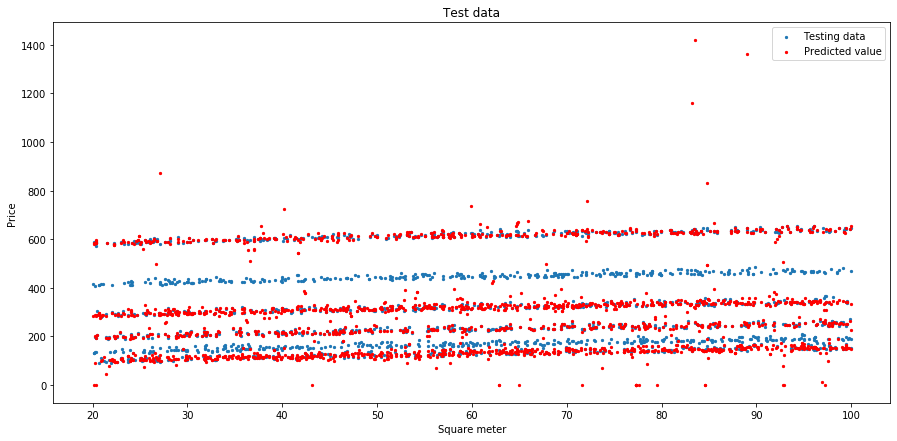

In [46]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][0] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Square meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
645472.4196322969


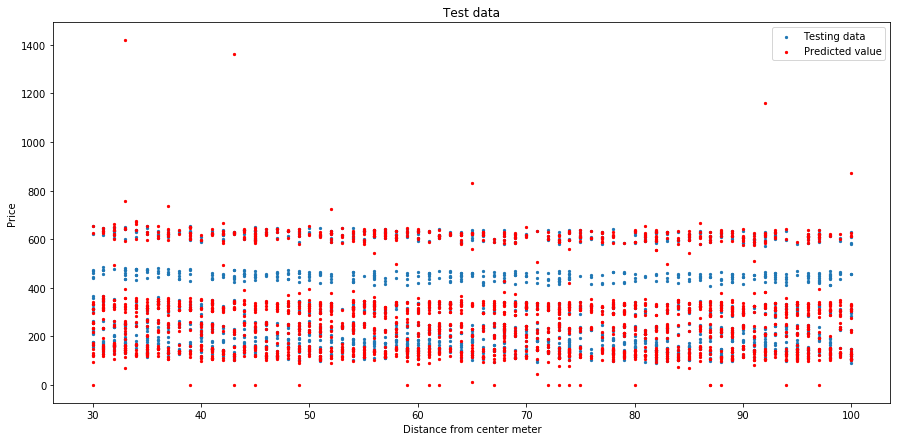

In [47]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][1] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Distance from center meter")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
645472.4196322969


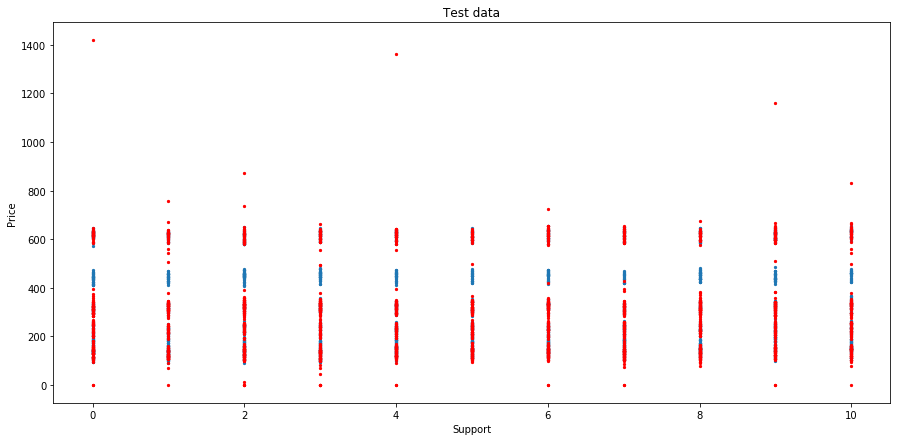

In [44]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][2] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][2] for i in range(len(X_test)) ],diff,c="r",s=5)
#plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("Support")
plt.ylabel("Price")
plt.title("Test data")

plt.show()

2000
2000
645472.4196322969


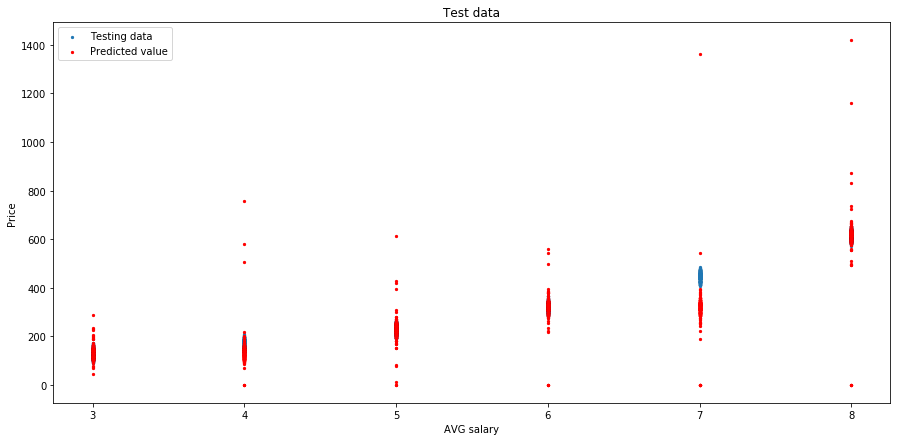

In [48]:
plt.rcParams["figure.figsize"] = (15,7)
print(len(X_test))
print(len(y_test))
plt.scatter([ X_test[i][3] for i in range(len(X_test)) ],y_test,s=5)
plt.scatter([ X_test[i][3] for i in range(len(X_test)) ],diff,c="r",s=5)
plt.legend(["Testing data" , "Predicted value"])
print(sum(y_test))
plt.xlabel("AVG salary")
plt.ylabel("Price")
plt.title("Test data")

plt.show()